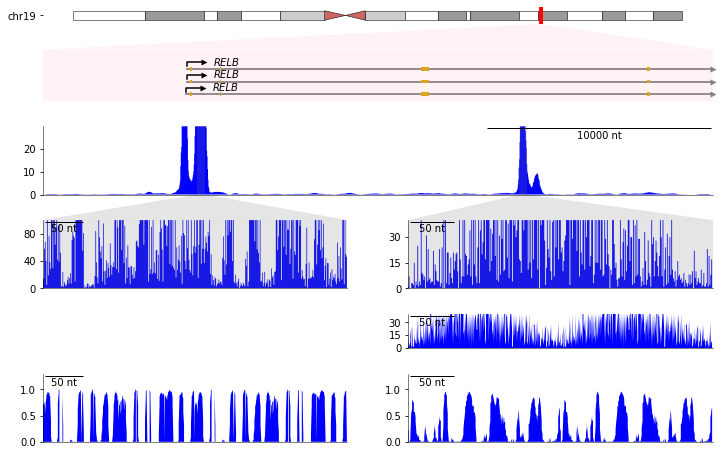

In [35]:
from genome_tools.plotting import gencode_annotation_track
from genome_tools.plotting import segment_track
from genome_tools.plotting import connectors
from genome_tools import genomic_interval
from genome_tools import plotting
from genome_tools.plotting import continuous_data_track
from footprint_tools import cutcounts

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from pylab import rcParams
#rcParams['pdf.fonttype'] = 42

fig=plt.figure()
fig.set_size_inches(12, 8)

gs=gridspec.GridSpec(6, 2, height_ratios=[0.25, 0.75, 1, 1, 0.5, 1], hspace=0.5)

# Chromosome ideogram
ax_ideogram=fig.add_subplot(gs[0,:])
interval_lg=genomic_interval("chr19", 44995000, 45025000)
plotting.ideogram("/home/chang/group_project/cytoBandIdeo.txt.gz").render(ax_ideogram, interval_lg.chrom, interval_lg.start)

# GENCODE gene annotation track
gencode_file_url = "/home/chang/group_project/gencode.v25.chr_patch_hapl_scaff.basic.annotation.gff3.gz"
ax_gencode=fig.add_subplot(gs[1,:])
track=gencode_annotation_track(interval_lg)
track.load_data(gencode_file_url)
track.render(ax_gencode)

# DNase I per-nucleotide cleavage data
ax_lg=fig.add_subplot(gs[2,:])
url="/home/chang/group_project/reads.bam"
data=cutcounts.bamfile(url)

cuts=data[genomic_interval("chr19", 45001881, 45002279).widen(1)]
summed_cuts=(cuts['+'][1:] + cuts['-'][:-1])[:-1]

cuts_lg=data[interval_lg.widen(1)]
summed_cuts_lg=(cuts_lg['+'][1:] + cuts_lg['-'][:-1])[:-1]

track=continuous_data_track(interval_lg, summed_cuts_lg, density={'window_size': 250, 'norm_factor':250}, fill_between=0, min=0, max=30, scale_bar=10000)
track.render(ax_lg)

#call-out zoom effect between ideogram and gene annotation track
c1, c2, b1,b2, p = connectors.zoom_effect(ax_gencode, ax_ideogram, ls='--', facecolor='pink')

#add a zoomed in track
ax_zoom=fig.add_subplot(gs[3,0])
track=continuous_data_track(genomic_interval("chr19", 45001881, 45002279), summed_cuts, fill_between=0, min=0, max=100, scale_bar=50, scale_bar_loc=2)
track.render(ax_zoom)


c1, c2, b1,b2, p = connectors.zoom_effect(ax_zoom, ax_lg, 
                           xlims=(45001881, 45002279), 
                           ls='--', facecolor='grey')
####
cuts=data[genomic_interval("chr19", 45016350, 45016700).widen(1)]
summed_cuts=(cuts['+'][1:] + cuts['-'][:-1])[:-1]

cuts_lg=data[interval_lg.widen(1)]
summed_cuts_lg=(cuts_lg['+'][1:] + cuts_lg['-'][:-1])[:-1]

#add a zoomed in track
ax_zoom=fig.add_subplot(gs[3,1])
track=continuous_data_track(genomic_interval("chr19", 45016350, 45016700), summed_cuts, fill_between=0, min=0, max=40, scale_bar=50, scale_bar_loc=2)
track.render(ax_zoom)


c1, c2, b1,b2, p = connectors.zoom_effect(ax_zoom, ax_lg, 
                           xlims=(45016350, 45016700), 
                           ls='--', facecolor='grey')

from genome_tools import load_data

x = load_data('/home/chang/group_project/interval.all.exp.bedgraph.gz', genomic_interval("chr19", 45016350, 45016700),
              data_columns=[4]).T
ax_zoom=fig.add_subplot(gs[4,1])
track=continuous_data_track(genomic_interval("chr19", 45016350, 45016700), x, fill_between=0, min=0, max=40, scale_bar=50, scale_bar_loc=2)
track.render(ax_zoom)

x = load_data('/home/chang/group_project/interval.all.fpr.bedgraph.gz', genomic_interval("chr19", 45016350, 45016700), 
              data_columns=[4]).T
ax_zoom=fig.add_subplot(gs[5,1])
track=continuous_data_track(genomic_interval("chr19", 45016350, 45016700), x, fill_between=0, min=0, max=1.3, scale_bar=50, scale_bar_loc=2)
track.render(ax_zoom)

x = load_data('/home/chang/group_project/interval.all.fpr.bedgraph.gz', genomic_interval("chr19", 45001881, 45002279), 
              data_columns=[4]).T
ax_zoom=fig.add_subplot(gs[5,0])
track=continuous_data_track(genomic_interval("chr19", 45001881, 45002279), x, fill_between=0, min=0, max=1.3, scale_bar=50, scale_bar_loc=2)
track.render(ax_zoom)


#x = load_data('/home/chang/group_project/interval.all.exp.bedgraph.gz', genomic_interval("chr19", 45001881, 45002279), data_columns=[4]).T
#ax_zoom=fig.add_subplot(gs[4,0])
#track=continuous_data_track(genomic_interval("chr19", 45001881, 45002279), x, fill_between=0, min=0, max=90, scale_bar=50, scale_bar_loc=2)
#track.render(ax_zoom)

In [1]:
from genome_tools.plotting import gencode_annotation_track
from genome_tools.plotting import segment_track
from genome_tools.plotting import connectors
from genome_tools import genomic_interval
from genome_tools import plotting
from genome_tools.plotting import continuous_data_track
from footprint_tools import cutcounts

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from pylab import rcParams
fig=plt.figure()
fig.set_size_inches(12, 28)

gs=gridspec.GridSpec(6, 1, height_ratios=[0.25, 0.75, 1, 1, 0.5, 1], hspace=0.5)

# Chromosome ideogram
ax_ideogram=fig.add_subplot(gs[0,0])
#chr18:36,924,025-37,849,095
interval_lg=genomic_interval("chr18", 36924025, 37849095)
plotting.ideogram("/home/chang/group_project/cytoBandIdeo.txt.gz").render(ax_ideogram, interval_lg.chrom, interval_lg.start)

# GENCODE gene annotation track
gencode_file_url = "/media/chang/HDD-1/reference_cellranger/refdata-gex-mm10-2020-A/genes.gtf.gz"
ax_gencode=fig.add_subplot(gs[1,0])
track=gencode_annotation_track(interval_lg)
track.load_data(gencode_file_url)
track.render(ax_gencode)

# DNase I per-nucleotide cleavage data
ax_lg=fig.add_subplot(gs[2,0])
url="/media/chang/HDD-7/chang/daniele/outs/possorted_genome_bam.bam"
data=cutcounts.bamfile(url)

cuts=data[genomic_interval("chr18", 36924025, 37849095).widen(1)]
summed_cuts=(cuts['+'][1:] + cuts['-'][:-1])[:-1]

cuts_lg=data[interval_lg.widen(1)]
summed_cuts_lg=(cuts_lg['+'][1:] + cuts_lg['-'][:-1])[:-1]

track=continuous_data_track(interval_lg, summed_cuts_lg, density={'window_size': 150, 'norm_factor':150}, fill_between=0, min=0, max=1, scale_bar=10000)
track.render(ax_lg)
c1, c2, b1,b2, p = connectors.zoom_effect(ax_gencode, ax_ideogram, ls='--', facecolor='pink')


ImportError: cannot import name 'gencode_annotation_track' from 'genome_tools.plotting' (/home/chang/.local/lib/python3.7/site-packages/genome_tools-1.0.3-py3.7.egg/genome_tools/plotting/__init__.py)

In [45]:
# Fig1B
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd
import numpy as np
import pysam

from genome_tools import genomic_interval
from genome_tools.plotting import gencode_annotation_track
from genome_tools.plotting import segment_track

In [2]:
def unpack(s):
    """Converts a 1-based UCSC coordinate string
    into a a genomic_interval object"""

    tmp = s.replace(",", "")
    (chrom, pos_str) = tmp.split(":")
    start, end = pos_str.split("-")
    return genomic_interval(chrom, int(start)-1, int(end))

class tabix_reader(object):
    def __init__(self, fname, interval):
        self.tabix_handle=pysam.TabixFile(fname)
        self.iter = self.tabix_handle.fetch(interval.chrom, interval.start, interval.end)
    def read(self, n=0):
        try:
            return next(self.iter) + "\n"
        except StopIteration:
            return ''
    def __iter__(self):
        return self
    def __next__(self):
        return self.read()

def tabix_query(filename, interval, fill_val=np.nan):
    """Call tabix and generate an array of strings for each line it returns.
       Posterior matrix removes positions where no sample has posterior value
       >0.8 to save space, so the function adds these positions back and fills them
       with a user-defined fill value
    """
    ret=pd.read_csv(
        tabix_reader(filename, interval),
        delimiter="\t", header=None,
        index_col=1).drop([0, 2], axis=1)

    ret.index.name="pos"
    ret.columns=np.arange(ret.shape[1])

    pos_index=pd.Index(np.arange(interval.start, interval.end))

    na_pos=pos_index[~pos_index.isin(ret.index)]
    na_df=pd.DataFrame(np.full([na_pos.shape[0], ret.shape[1]], fill_val), index=na_pos)

    return pd.concat([ret, na_df]).sort_index().T

In [3]:
sample_info_file="https://resources.altius.org/~jvierstra/projects/footprinting.2020/Supplementary_Table_1.xlsx"
samples=pd.read_excel(sample_info_file, skiprows=16, index_col=0)
samples.head()

,Taxonomy_class,Taxonomy_system,Description,Individual ID,SPOT,Total_reads,Unique_reads,DCC_experiment_id,DCC_library_id,DCC_biosample_id,DCC_file_id_FDR_1%
Identifier,,,,,,,,,,,
AG10803-DS12374,Primary,Connective,Abdominal skin Fibroblast,Z68,0.6904,369891377,220628368,ENCSR000EMB,ENCLB410ZZZ,ENCBS287ITL,ENCFF989WCF
AoAF-DS13513,Primary,Connective,Aortic Adventitial Fibroblasts,Z94,0.6395,393665970,317762220,ENCSR000EMC,ENCLB412ZZZ,ENCBS408ZNY,ENCFF587TUM
CD19+-DS17186,Primary,Hematopoietic,CD19+ B cells,Z8,0.5056,601010994,488593380,ENCSR381PXW,ENCLB800FZO,ENCBS469TSJ,ENCFF976ZIX
CD20+-DS18208,Primary,Hematopoietic,B cells,Z144,0.5570,300895833,229005077,ENCSR000EMJ,ENCLB425ZZZ,ENCBS483ENC,ENCFF197KBO
GM06990-DS7748,Lines,Hematopoietic,Lymphoblastoid,Z73,0.6547,238189351,142211228,ENCSR000EMQ,ENCLB435ZZZ,ENCBS057ENC,ENCFF825VXW


In [4]:
interval = unpack("chr19:45,001,882-45,002,279")
# Alternative:
interval = genomic_interval("chr19", 45001881, 45002279)

# Posterior footprint probability file
posterior_file_url = "/home/chang/group_project/posteriors.per-nt.bed.gz"

# Read the remotely hosted TABIX-file into a pandas DataFrame class
posteriors=tabix_query(posterior_file_url, interval, fill_val=0)
posteriors.set_index([samples.index, samples["Taxonomy_system"]], inplace=True)
posteriors.columns.name=interval.chrom

posteriors.head()

,chr19,45001881,45001882,45001883,45001884,45001885,45001886,45001887,45001888,45001889,45001890,...,45002269,45002270,45002271,45002272,45002273,45002274,45002275,45002276,45002277,45002278
Identifier,Taxonomy_system,,,,,,,,,,,,,,,,,,,,,
AG10803-DS12374,Connective,0.000000e+00,0.0,0.0,0.0,0.0,7.638446e-07,2.667737e-02,4.164443e-08,1.065814e-14,7.105427e-15,...,2.027643e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AoAF-DS13513,Connective,1.585874e-08,0.0,0.0,0.0,0.0,1.064823e-08,2.448578e-07,1.903719e-08,0.000000e+00,0.000000e+00,...,6.821210e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CD19+-DS17186,Hematopoietic,7.332801e-12,0.0,0.0,0.0,0.0,0.000000e+00,5.897505e-13,0.000000e+00,0.000000e+00,0.000000e+00,...,6.397835e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CD20+-DS18208,Hematopoietic,1.186453e-08,0.0,0.0,0.0,0.0,2.842171e-14,4.969465e-10,8.171241e-13,0.000000e+00,0.000000e+00,...,4.286500e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GM06990-DS7748,Hematopoietic,2.450270e-05,0.0,0.0,0.0,0.0,6.063725e-07,2.277550e-05,5.864173e-07,0.000000e+00,0.000000e+00,...,1.101544e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Consensus footprints')

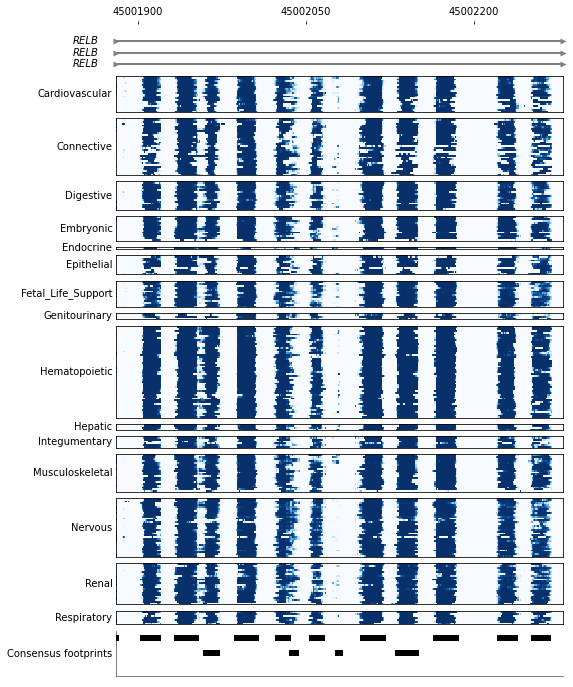

In [36]:
# We are grouping by biosample taxonomy
# level=1 is second level of multi-index
group_sizes=posteriors.groupby(level=1).size()
num_groups=group_sizes.shape[0]

# Code to draw figure
fig=plt.figure()
fig.set_size_inches(8, 12)
gs=gridspec.GridSpec(num_groups+2, 1, height_ratios=[0.1] + list(group_sizes/np.sum(group_sizes)) + [0.1])

# Plot gene track

# Gencode annotation
gencode_file_url = "/home/chang/group_project/gencode.v25.chr_patch_hapl_scaff.basic.annotation.gff3.gz"

ax=fig.add_subplot(gs[0,:])
trk_genes = gencode_annotation_track(interval)
trk_genes.load_data(gencode_file_url)
trk_genes.render(ax)

ax.xaxis.set_visible(True)
ax.xaxis.set_ticks_position("top")

#
row=1
for group, df in posteriors.groupby(level=1):
    ax=fig.add_subplot(gs[row,:])
    ax.pcolormesh(1-np.exp(-df), cmap="Blues")
    ax.xaxis.set_visible(False)

    ax.yaxis.set_ticks([])
    ax.set_ylabel(group, rotation=0, ha="right", va="center")

    row+=1

#
ax=fig.add_subplot(gs[row,:])

fps_file_url="/home/chang/group_project/consensus_footprints_and_motifs_hg38.bed.gz"

trk_fps=segment_track(interval, edgecolor=None, facecolor="k")
trk_fps.load_data(fps_file_url)
trk_fps.render(ax)

ax.yaxis.set_visible(True)
ax.yaxis.set_ticks([])
ax.set_ylabel("Consensus footprints", rotation=0, ha="right", va="center")

In [37]:
interval = genomic_interval("chr19", 45016350, 45016700)

# Posterior footprint probability file
posterior_file_url = "/home/chang/group_project/posteriors.per-nt.bed.gz"

# Read the remotely hosted TABIX-file into a pandas DataFrame class
posteriors=tabix_query(posterior_file_url, interval, fill_val=0)
posteriors.set_index([samples.index, samples["Taxonomy_system"]], inplace=True)
posteriors.columns.name=interval.chrom

posteriors.head()

,chr19,45016350,45016351,45016352,45016353,45016354,45016355,45016356,45016357,45016358,45016359,...,45016690,45016691,45016692,45016693,45016694,45016695,45016696,45016697,45016698,45016699
Identifier,Taxonomy_system,,,,,,,,,,,,,,,,,,,,,
AG10803-DS12374,Connective,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AoAF-DS13513,Connective,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CD19+-DS17186,Hematopoietic,1.985136e-08,2.664229e-08,2.257923e-07,0.000692,0.013522,0.041382,0.305234,1.317560,2.661669,0.0,...,0.003861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CD20+-DS18208,Hematopoietic,2.847548e-02,4.258745e-02,1.601713e-01,0.173592,0.480981,0.224797,0.487653,0.135871,0.312837,0.0,...,0.174270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GM06990-DS7748,Hematopoietic,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.178542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Consensus footprints')

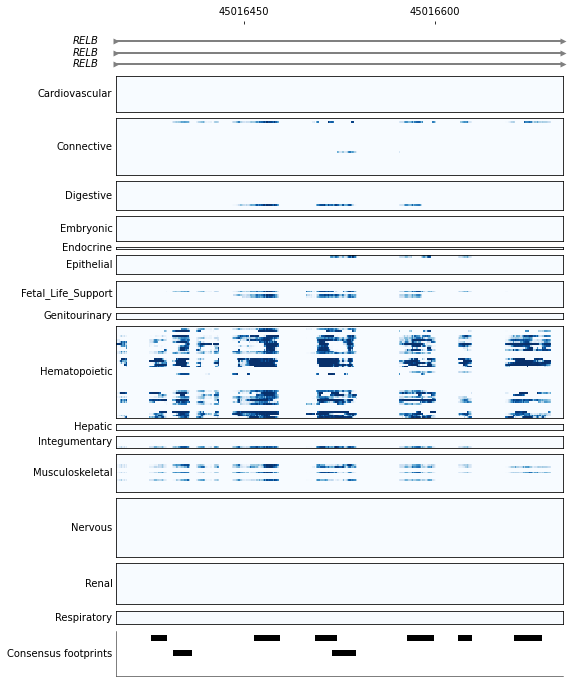

In [38]:
# We are grouping by biosample taxonomy
# level=1 is second level of multi-index
group_sizes=posteriors.groupby(level=1).size()
num_groups=group_sizes.shape[0]

# Code to draw figure
fig=plt.figure()
fig.set_size_inches(8, 12)
gs=gridspec.GridSpec(num_groups+2, 1, height_ratios=[0.1] + list(group_sizes/np.sum(group_sizes)) + [0.1])

# Plot gene track

# Gencode annotation
gencode_file_url = "/home/chang/group_project/gencode.v25.chr_patch_hapl_scaff.basic.annotation.gff3.gz"

ax=fig.add_subplot(gs[0,:])
trk_genes = gencode_annotation_track(interval)
trk_genes.load_data(gencode_file_url)
trk_genes.render(ax)

ax.xaxis.set_visible(True)
ax.xaxis.set_ticks_position("top")

#
row=1
for group, df in posteriors.groupby(level=1):
    ax=fig.add_subplot(gs[row,:])
    ax.pcolormesh(1-np.exp(-df), cmap="Blues")
    ax.xaxis.set_visible(False)

    ax.yaxis.set_ticks([])
    ax.set_ylabel(group, rotation=0, ha="right", va="center")

    row+=1

#
ax=fig.add_subplot(gs[row,:])

fps_file_url="/home/chang/group_project/consensus_footprints_and_motifs_hg38.bed.gz"

trk_fps=segment_track(interval, edgecolor=None, facecolor="k")
trk_fps.load_data(fps_file_url)
trk_fps.render(ax)

ax.yaxis.set_visible(True)
ax.yaxis.set_ticks([])
ax.set_ylabel("Consensus footprints", rotation=0, ha="right", va="center")